# Monty Hall problem #
*By Rosana de Oliveira Gomes*

Learning probability and implementing Monte Carlo simulations with the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). 


### Problem:
The Monty Hall problem is a probability puzzle inspired on the TV show *Let's Make a Deal* and named after its original host, Monty Hall. 

The problem statement is the following: 

*Given 3 closed doors containing 2 goats and 1 car, find a scenario that maximizes the chances of open a door with the car.*

<img src="Monty_open_door.svg" width="200">

*Source: [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)*

In this problem, once the players choose a door, it is given the chance to change their mind. This results in two possible scenarios: 

**Scenario One:** Choose number of a door and keep the choice after one door that has a goat is revealed.


**Scenario Two:** Choose number of a door and change choice after one door that has a goat is revealed.


Putting it in a mathematical way, we want to answer the question: *What scenario has the highest probability of getting a car?*

In what follows, we are going to solve this problem following two approaches:
* Numerical approach: implementing a Monte Carlo simulation for the problem,
* Analytical approach: solving the problem using probability theory.

In [1]:
import numpy as np
import matplotlib.pylab as plt

### Generating a Random Game ###

Create a function `Game()` that randomly selects a car or a goat from a list `L` and assigns a door to each in the variable `game`. The door  that contains the car is stored in the variable `KeyCar`.

One can test the function with the variable `game1` and check if it returns random games. 


In [2]:
# Generate game randomly

def Game():
    
    global KeyCar
    
    L=['car','goat','goat']
    np.random.shuffle(L)
     
    game={'door1':L[0], 'door2':L[1], 'door3':L[2]}
    
    KeyCar = 'door{}'.format(L.index('car')+1)

    #print(KeyCar, L.index('car'))

    return game 


game1 = Game()    

game1

{'door1': 'goat', 'door2': 'car', 'door3': 'goat'}

### Choosing First Door ###

Now the player chooses the first door to be opened with the function `FirstChoice(game)`, which has a dictionary game as an input and a randomly chosen door as an output.  

This is done by first storing the game keys in the variable `keys`, followed by a random key selection stored in a variable `choice`.   

One can check a random door choice with the variable `choice1`. 

In [3]:
# Player's first random choice

def FirstChoice(game):
    # keys gives an iterator of the keys in a dictionary
    keys=list(game.keys())

    # choice returns a random choice from a list
    choice= np.random.choice(keys)
    return choice 

choice1= FirstChoice(game1)
print(choice1)

door1


### Opening First Door ###

We want to open a door that has a goat and that is not the player's choice. For that, we create a function `OpenDoor(game,choice)` that has the game dictionary and the player's first door choice as an input.   

First, we make a copy of the  already defined `game` dictionary into a `CopyDic` variable. The players's first choice is then removed from the `CopyDic` keys. 

Also we need to check if the player's choice is different from the door that contains a car, in order to avoid trying to remove the same key twice. The remaining keys are store in the variable `keys2`, which is used to randomly select the new door to be opened in the variable `door`. 

The function return the first to be opened. 
In the example given above, one can check the randomly generated game, the player's first choice of door and the first door opened by printing `game1`, `choice1`, `open1`. 

In [4]:
# Opens a door with a goat

def OpenDoor(game,choice):
    
    # Make a copy of the game dictionary and exclude player's choice and car
    CopyDic = game.copy()
    del CopyDic[choice]    
    
    if choice != KeyCar:
        del CopyDic[KeyCar]

    # Get keys from the shorter dictionary
    keys2 = list(CopyDic.keys())
    
    # Choose randomly a key 
    door = np.random.choice(keys2)
    
    return door

open1 = OpenDoor(game1,choice1)

print(game1, choice1, open1)


{'door1': 'goat', 'door2': 'car', 'door3': 'goat'} door1 door3


### Choosing New Door ###

Now the player knows what is behind one of the doors and can choose between keeping the first choice or choose the remaining door. 


In [5]:
# Player new door choice

def NewChoice(game,choice,opend):
   
    # Make a copy of the game dictionary and exclude player's choice and car
    CopyDic = game.copy()
    del CopyDic[choice]    
    
    if choice != opend:
        del CopyDic[opend]

    # Get keys from the shorter dictionary
    newdoor = list(CopyDic.keys())
    
    if len(newdoor)!= 1:
        raise ValueError('Chosen and opened door cannot be the same')
    
    return newdoor[0]
    
newdoor1= NewChoice(game1,choice1,open1)

print('Game:', game1, ', First Choice:', choice1, ', Open Door:', open1, ', New Choice:', newdoor1)


Game: {'door1': 'goat', 'door2': 'car', 'door3': 'goat'} , First Choice: door1 , Open Door: door3 , New Choice: door2


### Game Results ###

Once the game setup and choices for door and stablished, we can now write a new function `GetResults`. The function displays the game results for a given choice of game strategy (choice of changing door to be opened or not), represented by the variable `change_door`.

In [6]:
# Game implementation and results

def GameResult(change_door):
      
    game = Game()                  # create game setup
    
    choice = FirstChoice(game)     # player chooses door 
    
    opend = OpenDoor(game,choice)  # door with goat is opened
    
    # Check if player chooses to change doors
    if change_door: 
        choice = NewChoice(game,choice,opend)
   
      
    return game[choice]

results = GameResult(False)
print(results)

goat


### Loop for several games ###

For estimating the probability of getting a car with each strategy, we now perform several simulations randomly for both cases of changing the first choice and not. 

We start with not changing the first choice:


In [7]:
def GetProbability(change_door):

    # Setting number of cars and goats in the simulation
    cars = 0
    goats = 0
    number = 500000

    # Making a loop over number of times game is played
    for i in range(number):

        results1 = GameResult(change_door)

        if results1 == 'car':
            cars += 1
        else:
            goats +=1

    prob_car = cars/(cars+goats) 
    prob_goat = goats/(cars+goats)

    return prob_car

# Checking results for the two strategies (not changing and changing door choice)
    
game_nochange = GetProbability(False)
    
print('Probability of winning a car without changing door:', game_nochange)

game_change = GetProbability(True)
    
print('Probability of winning a car changing door:', game_change)

Probability of winning a car without changing door: 0.333164
Probability of winning a car changing door: 0.666388


## Convergence of Monte Carlo estimations ###

Now that we got the respective probabilities for getting a car in both scenarios, we can go a step further and analyze how the probabilities converge as a function of the number of games played. 

For doing that, we modify the function `GetProbability` into the function `ProbConv`, which also has the variable `change_door` as an argument. The difference here is that we will store the probability of getting a car for each game played.

In [8]:
def ProbConv(change_door):

    # Setting number of cars and goats in the simulation
    cars = 0
    goats = 0
    number = 100000
    
    # Empty list to store car probabilities
    probs_car = []
    
    # Making a loop over number of times game is played
    for i in range(number):

        results1 = GameResult(change_door)

        if results1 == 'car':
            cars += 1
        else:
            goats +=1

        prob_car = cars/(cars+goats) 
#        prob_goat = goats/(cars+goats)
        probs_car.append(prob_car)        

    return probs_car

We can visualize the probabilies in different scenarios by creating a function `PlotProb`, which has again the variable `change_door` as an argument:

In [9]:
def PlotProb(change_door):

    # Getting the probabilities of getting a car
    probs_nochange = ProbConv(change_door)
    
    if change_door == False:
        label = 'keeping door choice'
        expected  = 1/3
    else:
        label = 'changing door choice'
        expected  = 2/3
    
    plt.figure()
    plt.title('Probability convergence ' + label)
    plt.xlabel('iteration')
    plt.ylabel('Probability of getting a car')
    plt.plot(probs_nochange,color='black')
    
    # Highlighting the expected value
    plt.axhline(expected,color='red',linewidth=0.7)
 
    max = expected + 0.05
    min = expected - 0.05
    plt.ylim(min,max)


We can now have a look at the results for both cases:

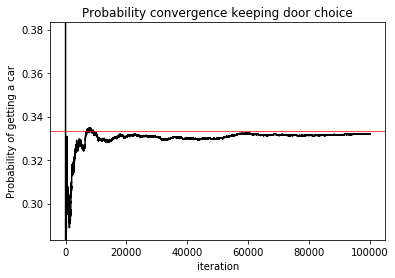

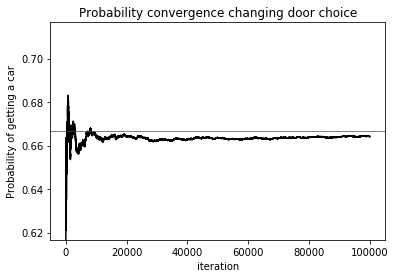

In [10]:
PlotProb(False)
PlotProb(True)

From the probabilities plots, we can see that the values converge to the red horizontal lines. 

Such lines represent the expected probability, which can be calculated with probability theory.
This is what we are going to see now. 

### Probability Trees ###

We can tackle the Monty Hall problem using an analytical solution based on probability trees, which provide a simple visualization of the problem.  

In first scenario, there are only two possible outcomes when the player chooses a door: either choosing a door with a car or a goat.  

Given that there are 1 car and 2 goats, we can calculate the respective probabilities of getting a car $P_{C1}$ and a goat  $P_{G1}$:

$$ P_{C1}= \frac{1}{3}, \quad P_{G1} = \frac{2}{3}, $$
which is equivalent to a probability of about 33% of getting a car, consistent with the results obtained by our simulation before.


This can be visualized below with the respective probability tree.


*\[Probability trees can be generated in python using the library graphviz\]*


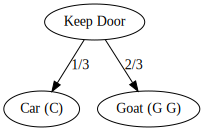

In [11]:
from graphviz import Digraph

graph = Digraph()

graph.node('A', 'Keep Door')
graph.node('B', 'Car (C)')
graph.node('C', 'Goat (G G)')

graph.edge('A', 'B', '1/3')
graph.edge('A', 'C', '2/3')

graph

After the player makes a door choice, a door with a goat behind is revealed. In this stage of the game, the doors statuses are:

* Door: chosen
* Door: goat
* Door: unknown

At this point, the player has the choice of keeping the chosen door or choose the remaining door (unknown). 

If the player chooses to keep the door choice, the probability of getting a car is the one shown above.

Hovever, if the player chooses to change doors, the probability of getting a car will depend on what is behind the  originally chosen door. Such a scenario can be visualized in the probability tree below.

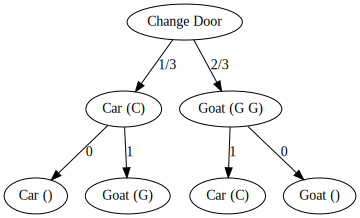

In [12]:
graph.node('A', 'Change Door')
graph.node('D', 'Car ()')
graph.node('E', 'Goat (G)')
graph.node('F', 'Car (C)')
graph.node('G', 'Goat ()')

graph.edge('B', 'D', '0')
graph.edge('B', 'E', '1')
graph.edge('C', 'F', '1')
graph.edge('C', 'G', '0')


graph

In this scenario, two possibilities can occur: 
* The first chosen door has a car, therefore, the new door choice has a goat;
* The first chosen door has a goat, therefore, the new door choice has a car.

We can define the following events:
* First door choice has a car $P_{C1}$
* First door choice has a goat $P_{G1}$
* Second door choice has a car $P_{C2}$
* Second door choice has a goat $P_{G2}$


The total probability of getting a car $P_C$ in this scenario is given by the *conditional probabilities* of the second choice given the first choice of door. 

The notation for conditional probability of an event A happening given that a event B happened is: $P(A|B)$.

In our case, to know the probability of getting a car after opening the second door ($C_2$), will be given by the sum of the conditional probabilities of :

$$ P_C = P(C_2|C_1) + P(C_2|G_1). $$


The conditional probabilities can be calculated by multiplying the probabilities along the probability tree. 

If the first door choice had a car behind it ($C_1$): 

$$ P(C_2|C_1) = 0 \times \frac{1}{3} = 0, $$

$$ P(G_2|C_1) = 1 \times \frac{1}{3} = \frac{1}{3}. $$

If the first door choice had a goat behind it ($G_1$): 


$$ P(C_2|G_1) = 1 \times \frac{2}{3} = \frac{2}{3} $$

$$ P(G_2|G_1) = 0 \times \frac{2}{3} = 0. $$


Putting all the conditional probabilities together, we can finally calculate the total probability of getting a car if the player chooses to change the door:

$$ P_C = P(C_2|C_1) + P(C_2|G_1) = 0 + \frac{2}{3}, $$
which is equivalent to a probability of about 67% of getting a car. 



These calculations show the results that we have already calculated: *by choosing to change doors, the players increase their chances of getting a car by a factor of 2!* 


In this notebook, you have learned about:
* Monty Hall problem,
* Monte Carlo simulations,
* Probability Trees and conditional probabilities.



**Next challenge: you can now use the approach presented in this notebook to calculate the probabilities of  modified Monty Hall problems, such as a setup in which instead of 3 door, you have 4 doors, 3 goats and 1 car.**  
